
# 1 Question 1
## 1. Explain how entropy is calculated.
Entropy is calculated by the following fumulation


$     Entropy(s) = \sum \limits _{j=1} ^{n} −P_{i}log_{2} P_{i} $ where

* s is the dataset or subset
* n is the number of classes in the subset
* $ p_{i} $ is the proportion of the ith class in the subset

For Examples:

For dataset：


| A | B | B1 | Y  |
| --- | --- | --- | --- |
| 0 | 0 | 1 | 0  | 
| 1 | 0 | 1 | 1  | 
| 1 | 0 | 1 | 1  | 
| 1 | 1 | 0 | 0  | 

calculating entropy(Y).

$ p_{y} = 2 / 4 = 0.5 $

$ p_{not y} = 2 / 4  = 0.5$

so

$ entropy(y) = -0.5*log_{2}0.5 - 0.5*log_{2}0.5 = 1.0 $



## 2. What do Entropy = 1 and Entropy = 0 mean?

* When all the items in the dataset is same, the Entropy = 0, and that means the dataset is pure and the disorder is 0
* When half of the dataset is 0 and the other half is 1, the Entropy = 1, and that means the dataset is most impure and the disorder is 1, and it contains most uncertainty.


## 3. Explain what overfit and underfit are and how they relate to decision tree pruning.

* Overfit means the depth of the tree is too high, and many of the leaves are small in size. The model fit the train data completely, but failed to generalize the test data.
* Underfit means the depth of the tree is very small, such as the decision stump, it can not capture the uderlying trend of the dataset.
* When the decision tree is overfitting, we should prune the tree.

## 4. Discuss how the size of a decision tree affects its performance. If four decision trees are trained on a dataset, including a baseline rule (R0), using only one variable (R1), a pruned tree, and an unpruned tree;

### (a) What differences in performance can be expected?

In general, the higher the tree, the lower the performance, the higher the accuracy. That's to say, the performance of R0 is the best. R0 > R1 > a pruned tree > an unpruned tree

### (b) Which trees are more likely to underfit or overfit the data?

Smaller tree depths are easier underfit, and Larger tree depths are easier overfit.


# 2 Question 2
## 2.1 Create a decision tree manually

Answer the following questions and create a decision tree for the Boolean function A∨(B∧C), using information gain and entropy:

### 1. Create a table with all combinations.

| A | B | C | Y  |
| --- | --- | --- | --- |
| 0 | 0 | 0 | 0  | 
| 0 | 0 | 1 | 0  | 
| 0 | 1 | 0 | 0  | 
| 0 | 1 | 1 | 1  | 
| 1 | 0 | 0 | 1  | 
| 1 | 0 | 1 | 1  | 
| 1 | 1 | 0 | 1  | 
| 1 | 1 | 1 | 1  | 

### 2. Compute the root entropy without any prior.


Entropy(s) = $ - 3/8 * log_{2}3/8 - 5/8 * log_{2}5/8 $ \
&nbsp;&nbsp;&nbsp;&nbsp;= 0.375 * 1.415 + 0.625 * 0.6781 \
&nbsp;&nbsp;&nbsp;&nbsp;= 0.9544375


### 3. Find the decision stump with the best score.
The best decison stump is A.

#### IG(s, A) 
IG(s, A) = Entropy(s) - 4/8 * Entropy(s0) - 4/8 * Entropy(s1) \
IG(s, A) = 0.954 - 0.5 * (-3/4 * $ log_{2}3/4 - 1/4 * log_{2}1/4) - 0.5 * 0 $ \
IG(s, A) = 0.954 - 0.5 * 0.81125 - 0.5 * 0 \
IG(s, A) = 0.548375


#### IG(s, B) 

IG(s, B) = Entropy(s) - 4/8 * Entropy(s0) - 4/8 * Entropy(s1) \
IG(s, B) = 0.954 - 0.5 * 0.5 - 0.5 * 0.81125 \
IG(s, B) = 0.298375

#### IG(s, C) 

IG(s, C) = Entropy(s) - 4/8 * Entropy(s0) - 4/8 * Entropy(s1) \
IG(s, C) = 0.954 - 0.5 * 0.5 - 0.5 * 0.81125 \ 
IG(s, C) = 0.298375

### 4. Split into two subsets based on the stump.

* S1
| A | B | C | Y  |
| --- | --- | --- | --- |
| 0 | 0 | 0 | 0  | 
| 0 | 0 | 1 | 0  | 
| 0 | 1 | 0 | 0  | 
| 0 | 1 | 1 | 1  | 

* S2
| A | B | C | Y  |
| --- | --- | --- | --- |
| 1 | 0 | 0 | 1  | 
| 1 | 0 | 1 | 1  | 
| 1 | 1 | 0 | 1  | 
| 1 | 1 | 1 | 1  | 

### 5. Keep finding the next decision stump until you obtain the complete decision tree.

* S1
From the table, we can see that B or C has the same structure and infomation gain, so we choose B as the second split.
* S2
We do not need to split S2, since all the values of Y is 1.

## 2.2 Coding Practice
Answer the question above using the DecisionTreeClassifier method from sklearn. Plot the decision
tree and compare it with your answer from question 2.1.

In [1]:
import sys
sys.path

['/Users/shuming/Source/UoA/cs762/homework',
 '/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python39.zip',
 '/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python3.9',
 '/usr/local/Cellar/python@3.9/3.9.10/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload',
 '',
 '/usr/local/lib/python3.9/site-packages']

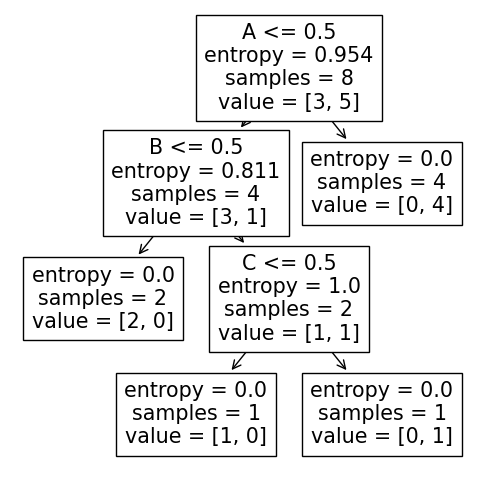

In [2]:
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt

# 'A', 'B', 'C', 'Y'
M = np.array([
    [0, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0, 1, 1, 1],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [1, 1, 1, 1]])

X = M[:, 0:3]
y = M[:, -1]

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=1)
clf.fit(X, y)

fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(clf, ax=ax, feature_names=['A', 'B', 'C', 'Y'])
plt.show()

# 3 Question 3
## 3.1 Create a decision tree manually
Create a decision tree for Table 1 using information gain and entropy:

Table 1: Verifying gemstones \
Colour Length Size Brightness Shape Class \
red long larger bright triangle TRUE \
red long small bright circle FALSE \
red long small bright triangle TRUE \
red short larger dull circle FALSE \
red short larger bright triangle TRUE \
blue short larger bright triangle FALSE

### 3.1.1 Find the decision stump with the best score.
Since the number of TRUE equals the number of False, so Entropy(s) = 1 

IG(s, Colour) = 1 - $ 5/6*Entrophy(s0) - 1/6*Entrophy(s1) $ 
Entrophy(s0) = $-3/5 * log_{2}3/5 - 2/5 * log_{2}2/5 $ = -0.6*-0.737 - 0.4*-1.322 = 0.971
Entrophy(s1) = 0
IG(s, Colour) = 1 - 0.83*0.971 - 1/6*0 = 0.19

IG(s, Shape) = 1 - $ 4/6*Entrophy(s0) - 2/6*Entrophy(s1) $ 
Entrophy(s0) = $-3/4 * log_{2}3/4 - 1/4 * log_{2}1/4 $ = -0.75*-0.415 - 0.25*-2 = 0.811
Entrophy(s1) = 0
IG(s, Shape) = 1 - 0.67*0.811 - 0 = 0.456

...


## 3.2 Coding Practice
Answer the question above using the DecisionTreeClassifier method from sklearn. Plot the decision
tree and compare it with your answer from question 3.1.


  Colour Length    Size Brightness     Shape  Class
0    red   long  larger     bright  triangle   TRUE
1    red   long   small     bright    circle  FALSE
2    red   long   small     bright  triangle   TRUE
3    red  short  larger       dull    circle  FALSE
4    red  short  larger     bright  triangle   TRUE
5   blue  short  larger     bright  triangle  FALSE
   Colour_red  Length_short  Size_small  Brightness_dull  Shape_triangle
0           1             0           0                0               1
1           1             0           1                0               0
2           1             0           1                0               1
3           1             1           0                1               0
4           1             1           0                0               1
5           0             1           0                0               1


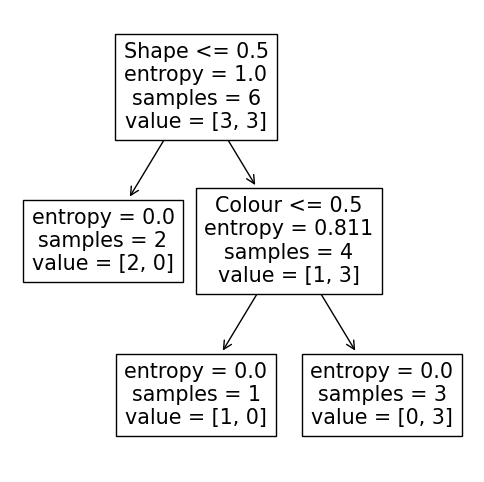

In [2]:
import numpy as np
from sklearn import tree
from matplotlib import pyplot as plt
import pandas as pd

data = pd.DataFrame()
data['Colour'] = ['red','red','red','red', 'red', 'blue']
data['Length'] = ['long','long','long','short','short','short']
data['Size'] = ['larger', 'small', 'small', 'larger', 'larger', 'larger']
data['Brightness'] = ['bright','bright','bright','dull','bright','bright']
data['Shape'] = ['triangle', 'circle', 'triangle', 'circle', 'triangle', 'triangle']
data['Class'] = ['TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE']
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1)
print(data[['Colour', 'Length', 'Size', 'Brightness', 'Shape', 'Class']])
one_hot_data = pd.get_dummies(data[['Colour', 'Length', 'Size', 'Brightness', 'Shape']], drop_first=True)
print(one_hot_data)
clf.fit(one_hot_data, data['Class'])

fig, ax = plt.subplots(figsize=(6, 6))
tree.plot_tree(clf, ax=ax, feature_names=['Colour', 'Length', 'Size', 'Brightness', 'Shape', 'Class'])
plt.show()